In [1]:
from fastai.vision.all import *


In [2]:
#Download data from paper

data_dir = Path("finland_bugs")

In [3]:
files = get_image_files(data_dir)
len(files)

15074

In [5]:
dataloaders = ImageDataLoaders.from_folder(path=data_dir, 
                                           valid_pct=0.2,
                                           bs=32,
                                           batch_tfms=aug_transforms(size=224, flip_vert=True)) #set.seed?

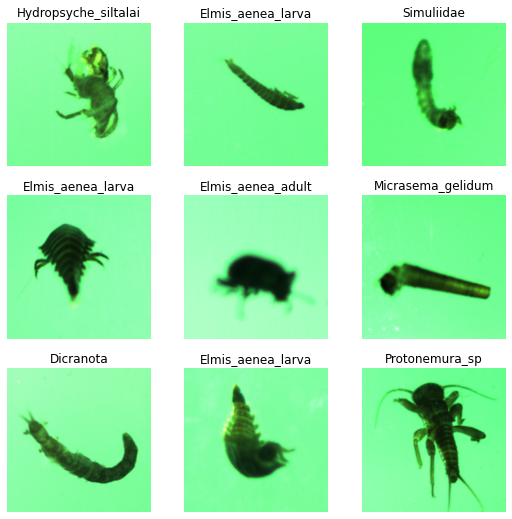

In [6]:
dataloaders.show_batch()

In [7]:
learn = cnn_learner(dataloaders, resnet50, metrics=error_rate) #.to_fp16()


SuggestedLRs(valley=0.0008317637839354575)

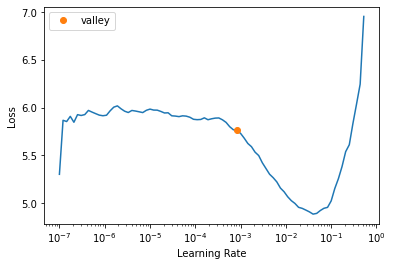

In [8]:
learn.freeze()
learn.lr_find()


In [9]:
learn.freeze()
learn.fit_one_cycle(2, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.638209,0.935421,0.278368,01:16
1,0.998438,0.654695,0.204711,01:16


SuggestedLRs(valley=2.511886486900039e-05)

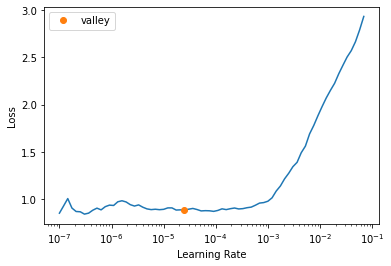

In [10]:
learn.unfreeze()
learn.lr_find()


In [11]:
learn.unfreeze()
learn.fit_one_cycle(2, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.867936,0.524346,0.165892,01:35
1,0.653459,0.455581,0.140345,01:36


In [12]:
learn.unfreeze()
learn.fit_one_cycle(2, 3e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.618022,0.423847,0.131719,01:36
1,0.519102,0.355411,0.109489,01:36


SuggestedLRs(valley=0.0002754228771664202)

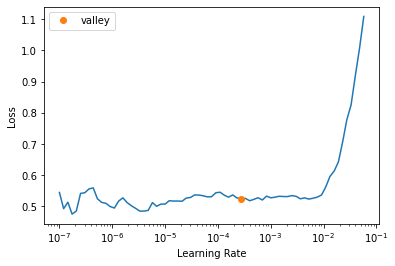

In [13]:
learn.freeze()
learn.lr_find()

In [14]:
learn.freeze()
learn.fit_one_cycle(2, 2e-4)

epoch,train_loss,valid_loss,error_rate,time
0,0.444200,0.335495,0.103517,01:18
1,0.433862,0.316384,0.096881,01:18


In [15]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.388189,0.306380,0.098540,01:35
1,0.359172,0.278814,0.085932,01:36
2,0.314440,0.273690,0.086264,01:36
3,0.273562,0.268309,0.080956,01:36


In [16]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.312422,0.271587,0.082283,01:35
1,0.279590,0.256148,0.077638,01:35
2,0.244517,0.249351,0.078633,01:36
3,0.230158,0.243842,0.076311,01:36


SuggestedLRs(valley=2.0892961401841603e-05)

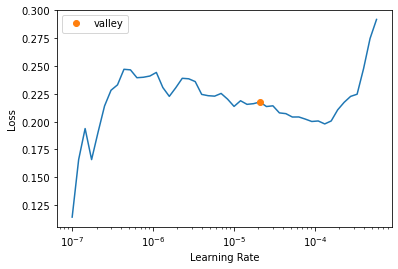

In [17]:
learn.unfreeze()
learn.lr_find()

In [18]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.217939,0.242035,0.075647,01:35
1,0.219606,0.239627,0.073988,01:35
2,0.233192,0.240760,0.074320,01:36
3,0.214513,0.239030,0.073988,01:36


In [19]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-7, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.385902,0.324346,0.102522,01:34
1,0.323063,0.287591,0.088255,01:35
2,0.249150,0.252774,0.076642,01:36
3,0.193980,0.240549,0.073656,01:36


In [20]:
learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-7, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.204263,0.239172,0.076311,01:36
1,0.196388,0.238270,0.070007,01:35
2,0.186935,0.231231,0.074652,01:38
3,0.189788,0.236018,0.073988,01:37


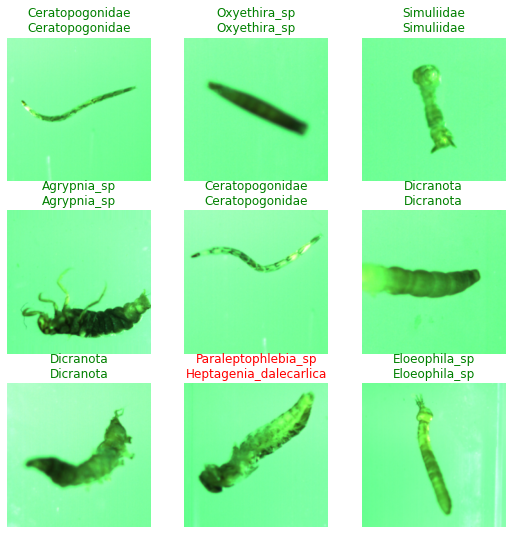

In [24]:
learn.show_results()


In [29]:
learn.export()

TypeError: save() missing 1 required positional argument: 'file'

In [31]:
learn_inf = load_learner('export.pkl')


In [ ]:
#https://github.com/fastai/fastbook/blob/master/02_production.ipynb

In [35]:
import ipywidgets as widgets


In [49]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [51]:
img = PILImage.create(btn_upload.data[-1])


In [52]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: 
    display(img.to_thumb(128,128))
out_pl

Output()

In [53]:
pred, pred_idx, probs = learn_inf.predict(img)


In [54]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Philopotamus_montanus; Probability: 0.5400')

In [55]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [56]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: 
        display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [57]:
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [59]:
widgets.VBox([widgets.Label('Select your bug!'), 
      btn_upload, btn_run, out_pl, lbl_pred])